In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
SEED = 42

In [28]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target
df = pd.DataFrame(X, columns=data.feature_names)
df['cancer'] = y
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [29]:
# Replace ' ' -> '_'
df.columns = df.columns.str.replace(' ', '_')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [30]:
df['cancer'].value_counts()

,count
cancer,
1,357
0,212


<Axes: xlabel='cancer', ylabel='count'>

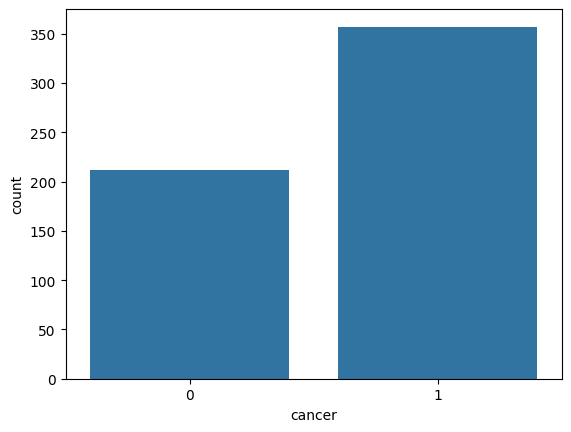

In [31]:
sns.countplot(data=df, x='cancer')

In [32]:
# Sum of rows which even 1 col's value is None
df.isnull().sum(axis=1).sum()

0

In [33]:
df.duplicated().sum()

0

<Axes: >

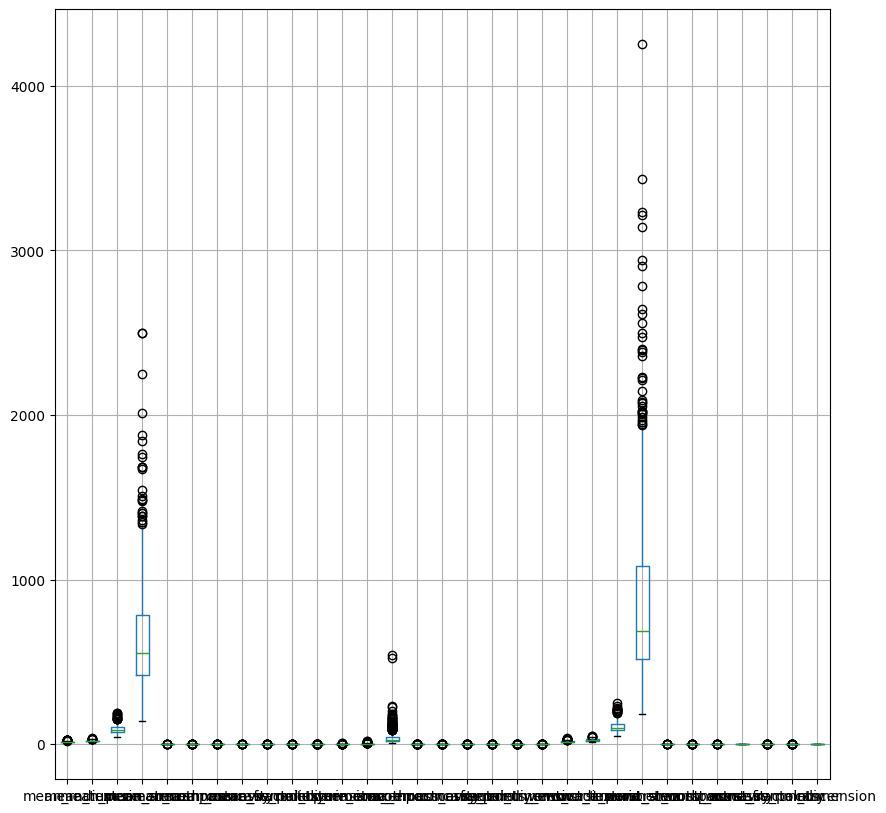

In [34]:
# Draw boxplot
df.boxplot(figsize=(10,10))

In [35]:
df.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
mean_radius,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.7800,28.1100
mean_texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.8000,39.2800
mean_perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.1000,188.5000
mean_area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.7000,2501.0000
mean_smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634


In [37]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.1, random_state=SEED, stratify=df['cancer'])
train.shape, test.shape

((512, 31), (57, 31))

In [38]:
train['cancer'].value_counts()

,count
cancer,
1,321
0,191


In [39]:
train.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,cancer
413,14.99,22.11,97.53,693.7,0.08515,0.10250,0.06859,0.03876,0.1944,0.05913,...,31.55,110.20,867.1,0.1077,0.33450,0.3114,0.13080,0.3163,0.09251,1
517,19.89,20.26,130.50,1214.0,0.10370,0.13100,0.14110,0.09431,0.1802,0.06188,...,25.23,160.50,1646.0,0.1417,0.33090,0.4185,0.16130,0.2549,0.09136,0
245,10.48,19.86,66.72,337.7,0.10700,0.05971,0.04831,0.03070,0.1737,0.06440,...,29.46,73.68,402.8,0.1515,0.10260,0.1181,0.06736,0.2883,0.07748,1
102,12.18,20.52,77.22,458.7,0.08013,0.04038,0.02383,0.01770,0.1739,0.05677,...,32.84,84.58,547.8,0.1123,0.08862,0.1145,0.07431,0.2694,0.06878,1
28,15.30,25.27,102.40,732.4,0.10820,0.16970,0.16830,0.08751,0.1926,0.06540,...,36.71,149.30,1269.0,0.1641,0.61100,0.6335,0.20240,0.4027,0.09876,0


In [40]:
X_train = train.drop('cancer', axis=1)
y_train = train['cancer']

X_train.shape, y_train.shape

((512, 30), (512,))

In [41]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_train_s # it's automatically changed to np.array

array([[ 0.25480383,  0.65241465,  0.23804349, ...,  0.25343762,
         0.42062373,  0.47696213],
       [ 1.6538891 ,  0.22812653,  1.60057602, ...,  0.71341983,
        -0.55397506,  0.41334442],
       [-1.03292567,  0.13638856, -1.03522395, ..., -0.70332538,
        -0.02381872, -0.35449371],
       ...,
       [-0.84447745, -1.19151857, -0.84842846, ..., -1.12771553,
        -0.51111811, -0.75832789],
       [-1.20538435,  0.0308899 , -1.14969817, ..., -0.24892328,
        -0.43810257,  0.05597883],
       [-0.98438598,  1.36567738, -0.98191285, ..., -0.79381369,
         0.81109816, -0.13376791]])

In [42]:
print(ss.mean_) # Each columns's mean value
print(ss.var_) # Each columns's variance

[1.40976035e+01 1.92653125e+01 9.17699219e+01 6.51975781e+02
 9.62870508e-02 1.03966172e-01 8.88658021e-02 4.86763574e-02
 1.80698828e-01 6.28233398e-02 4.05140234e-01 1.21968535e+00
 2.86684434e+00 4.04976348e+01 7.05874414e-03 2.54375977e-02
 3.22122746e-02 1.17436816e-02 2.06668906e-02 3.80017832e-03
 1.62273281e+01 2.56359766e+01 1.06974551e+02 8.76554492e+02
 1.32251895e-01 2.52835117e-01 2.73015795e-01 1.13995334e-01
 2.89800586e-01 8.38880859e-02]
[1.22660234e+01 1.90117335e+01 5.85523234e+02 1.22031399e+05
 1.87194793e-04 2.80045176e-03 6.49540891e-03 1.52626861e-03
 7.68144335e-04 4.96241629e-05 8.11280328e-02 3.16886467e-01
 4.34981070e+00 2.20622740e+03 9.40895057e-06 3.25309553e-04
 9.74649598e-04 3.84448944e-05 7.26030199e-05 7.28614629e-06
 2.31968941e+01 3.82357280e+01 1.12630234e+03 3.22085958e+05
 5.15764222e-04 2.43849632e-02 4.44346237e-02 4.39660655e-03
 3.96903568e-03 3.26768048e-04]


In [43]:
y_train_e = y_train.to_numpy()
y_train_e.shape

(512,)

In [44]:
print(X_train_s.shape, y_train_e.shape)
print(type(X_train_s), type(y_train_e))

(512, 30) (512,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [45]:
from sklearn.svm import SVC

clf = SVC(random_state=SEED)
clf.fit(X_train_s, y_train_e)

SVC(random_state=42)

In [46]:
X_test = test.drop('cancer', axis=1)
y_test = test['cancer']

X_test.shape, y_test.shape

((57, 30), (57,))

In [47]:
X_test_s = ss.transform(X_test)
X_test_s[:5:]

array([[ 0.10061892,  0.21895274,  0.11241113, -0.02655307,  0.17782227,
         0.31432445,  0.36149294,  0.28472889,  0.5160006 ,  0.26072472,
        -0.68792034, -1.01040749, -0.68125754, -0.44874202, -0.98283331,
        -0.5249179 , -0.3911761 , -0.71619338, -0.63925085, -0.67580025,
         0.43657271,  0.72515892,  0.32554558,  0.29504456,  1.0104649 ,
         0.97827843,  1.06114459,  1.05275097,  2.94442191,  0.96322273],
       [-0.81021414,  0.15932306, -0.74593891, -0.73820122, -1.17578943,
         0.2670827 ,  0.04807049,  0.18438971,  2.8432252 , -0.07003249,
         0.2859945 ,  1.21741366,  0.00486937, -0.12385722,  2.83016635,
         3.17039948,  1.5624182 ,  3.7298139 ,  1.58590785,  1.00649632,
        -0.90677785, -0.53464448, -0.85530943, -0.77345242, -1.29684368,
        -0.43888638, -0.5617575 , -0.3145273 ,  0.09046648, -0.76330666],
       [-0.08497402, -0.7970453 , -0.05537419, -0.19430279,  0.32253886,
         0.45416002, -0.13618617,  0.05154267, -0

In [48]:
y_test_e = y_test.to_numpy()
y_test_e

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1])

In [49]:
print(X_test_s.shape, y_test_e.shape)
print(type(X_test_s), type(y_test_e))

(57, 30) (57,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [50]:
y_pred = clf.predict(X_test_s)
y_pred

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1])

In [51]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix

# Define a function to print classification metrics and display a confusion matrix heatmap
def print_metrics(y_true, y_pred, ave='binary'):
    print('accuracy:', accuracy_score(y_test_e, y_pred))
    print('recall:', recall_score(y_test_e, y_pred, average=ave))
    print('precision:', precision_score(y_test_e, y_pred, average=ave))
    print('f1 :', f1_score(y_test_e, y_pred, average=ave))

    # Generate and display the confusion matrix as a heatmap
    clm = confusion_matrix(y_test_e, y_pred)
    s = sns.heatmap(clm, annot=True, fmt='d', cbar=False)
    s.set(xlabel='Predicted', ylabel='Actual')  # Set axis labels
    plt.show()

accuracy: 0.9649122807017544
recall: 0.9722222222222222
precision: 0.9722222222222222
f1 : 0.9722222222222222


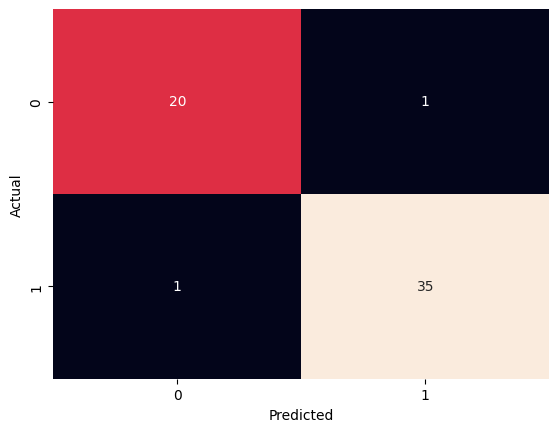

In [52]:
print_metrics(y_test_e, y_pred)

In [53]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for hyperparameter tuning
prams_grid = {
    'C': [0.01, 0.02, 0.05, 0.1, 0.5, 1, 10, 100],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf', 'poly']  # Types of kernel functions
}

# Initialize the SVC model with a fixed random seed for reproducibility
clf = SVC(random_state=SEED)

# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=clf,               # Model to be optimized
    param_grid=prams_grid,       # Parameter grid to search
    cv=3,                        # 3-fold cross-validation
    n_jobs=-1,                   # Use all available CPU cores for parallel processing
    refit=True,                  # Refit the model with the best parameters on the entire training data
    verbose=2,                   # Increase verbosity for progress updates
    return_train_score=True      # Include training scores in the results
)

# Perform grid search and fit the model on the training data
grid_search.fit(X_train_s, y_train_e)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.02, 0.05, 0.1, 0.5, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly']},
             return_train_score=True, verbose=2)

In [54]:
# Use the best estimator (model with optimal hyperparameters) to make predictions on the test data
y_pred = grid_search.best_estimator_.predict(X_test_s)
y_pred

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0])

accuracy: 0.9473684210526315
recall: 0.9444444444444444
precision: 0.9714285714285714
f1 : 0.9577464788732394


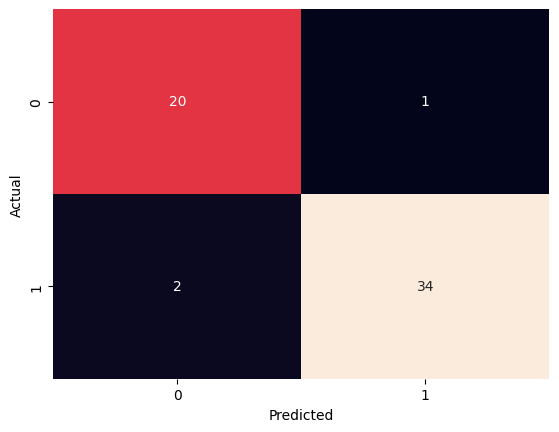

In [55]:
# Evaluate the model's performance using the custom print_metrics function
# This will display accuracy, recall, precision, F1 score, and the confusion matrix heatmap
print_metrics(y_test_e, y_pred)